### p.24,25 텐서플로 및 케라스 설치하기
### <아나콘다 프롬프트 관리자>
<font size=4><span style="line-height:150%">
    python –V　　　　　　　　　　　<font color='#60AE47'># 파이썬 버전 확인<br></font>
    pip install tensorflow == 2.0.0 　 　<font color='#60AE47'># 텐서플로우 버전 2.0.0을 설치</font>
<br><br><span style="line-height:150%"><font color='#50ACC3'>
┌ conda install  : 아나콘다에 등록되어있는 라이브러리 설치<br>
│　　　　　 　웬만한 라이브러리는 등록되어있음..<br>
│　　　　 　　하지만 버전이 낮을 수 있다<br>
└ pip install  : 직접 연결할 때 파이프로 설치
<br><br><span style="line-height:150%">
    **구글 코랩** : 구글에서 제공하는 주피터노트북 같은거,,</font>
<br><br><span style="line-height:150%">
pip install keras==2.3<br>
    python 　 　　　　　　<font color='#60AE47'># 아이파이썬 ; 인터프리터 상태로 python 들어옴</font><br>
import tensorflow as tf
    print(tf.__version__)　　　<font color='#60AE47'># 2.0.0</font><br>
    import keras　　　　　<font color='#60AE47'># Using Tensorflow backend # 케라스는 텐서플로우에 포함되어있음</font><br>
    exit()　　　　 　　　　<font color='#60AE47'># 파이썬에서 나옴</font>

### 당뇨병 환자 데이터셋(Diabetes)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# load_데이터셋이름
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


<font size=4><span style="line-height:150%">
data = 입력데이터,　target = 출력값<br>
data - 당뇨병 환자에 대한 다양한 정보들(피처) 가지고있음<br>
　　　일반적으로 2차원.<br>
　　　행 한줄 한줄 => 샘플 ,　 열 => 피처(속성)

In [4]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [5]:
diabetes.target[:3]

array([151.,  75., 141.])

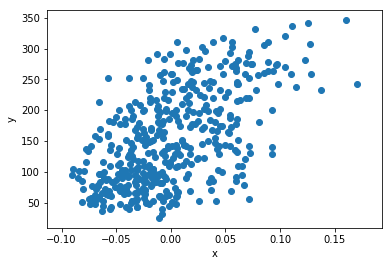

In [6]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
# 훈련데이터 생성
x = diabetes.data[:,2]
y = diabetes.target

<font size=4><span style="line-height:150%">
**경사하강법**<br>
기울기를 줄여가면서 모델에 가까워지게... ?  <br><br>
<span style="line-height:150%">
y = ax+b 선형회귀 (예측선)  
딥러닝에선...  
ŷ = wx+b　　(ŷ(y_hat) : 예측값, w : weight 기울기, 가중치, 계수, b : 절편,편향)  / ŷ = y^ <br><br><span style="line-height:150%">
예측값이 실제값과 최대한 비슷하게 나타나도록  
w와 b값을 조정함
</span></font>

### 예측값으로 올바른 모델을 찾아내는 작업

In [8]:
# step1. 임의의 w, b를 만든다
w = 1.0
b = 1.0

In [9]:
# step2. 훈련데이터의 첫번째 샘플을 이용해서 예측값(y_hat)
y_hat = x[0] * w + b
y_hat

1.0616962065186886

In [10]:
# step3. 타깃과 예측값을 비교한다
y[0]

151.0

In [11]:
# w값을 조절해서 예측값을 바꾸는 작업
# w값을 0.1만큼 증가
w_inc = w + 0.1                # inc = increase  # 변화율 0.1을 음수로 줘도 증가한다,,?
y_hat_inc = x[0] * w_inc + b
y_hat_inc                      # 증가전보다 결과값에 가까워졌으니 잘한 일이다
                               # 차이가 커졌다면 -0.1 을 해주자

1.0678658271705574

In [12]:
# w값을 조정한 후 예측값이 증가한 정도를 확인 (변화율)  # 첫번째 학습데이터의 변화율
w_rate = (y_hat_inc - y_hat) / (w_inc - w)                                # 학습비율
w_rate

0.061696206518688734

![image](https://user-images.githubusercontent.com/58851945/119231105-1644f200-bb5a-11eb-91d1-0466c799fb23.png)

In [13]:
x[0]

0.0616962065186885

In [14]:
x[1]

-0.0514740612388061

In [15]:
# 변화율을 업데이트 할 때(가중치 w를 업데이트 하는 방법)
w_new = w + w_rate
w_new

1.0616962065186888

w[0]이 양수이면 inc를 양수로(+0.1) 했을때 ŷ가 증가함  
w[0]이 음수이면 inc를 음수로 해야 ŷ가 증가함

w_rate가 양수라서 w에 더해줬다..?

### 변화율로 절편 업데이트 하기

In [16]:
y_hat_inc = x[0] * w + b
y_hat_inc

1.0616962065186886

In [17]:
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
y_hat_inc

1.1616962065186887

In [18]:
b_rate = (y_hat_inc - y_hat) / (b_inc - b)
b_rate

1.0

![image](https://user-images.githubusercontent.com/58851945/119231236-c581c900-bb5a-11eb-8f39-370a1f90d06d.png)

In [19]:
b_new = b+1       # 1 = b_rate  # 항상 1이므로 굳이 b_rate로 안쓰고 1로 써도됨
b_new

2.0

턱없이 차이가 많이 남  
수동적으로 업데이트해야함  
음수 어쩌구저쩌구,,,

### 오차 역전파로 가중치와 절편 업데이트하는 작업

예측값과 실제값의 차이를 이용

In [20]:
# 오차(y - y_hat)와 변화율을 곱해서 가중치(w)를 업데이트 하기
err = y[0] - y_hat            # err = error 오차
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


In [21]:
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat 

w_rate = x[1]
w_new = w_new + w_rate * err

# b_rate = 1
# b_new = b_new + b_rate * err
b_new = b_new + 1 * err

print(w_new, b_new)

14.132317616381767 75.52764127612664


In [22]:
# zip() : 여러 개의 배열에서 동시에 요소를 하나씩 반환해주는 함수
for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
    
print(w, b)

587.8654539985689 99.40935564531424


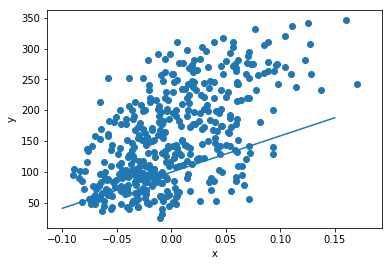

In [23]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [24]:
round(913.5973364345905, 5)

913.59734

In [25]:
# 에포크(epoch) : 입력 값에 대해 몇번이나 반복하여 실험했는지를 나타냄
for _ in range(1, 100):       # 처음부터(x[0]) 다시 모든과정 반복,, 3번 정도만 해도 최종결과와 거의 유사한 값이 나타남
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)    

913.5973364345905 123.39414383177204


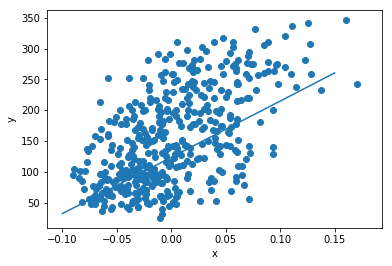

In [26]:
plt.scatter(x, y)
pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h3>y_hat = 913.6x + 123.4　　　　# 썩 나쁘진 않다..

In [27]:
# 모델을 이용한 예측
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

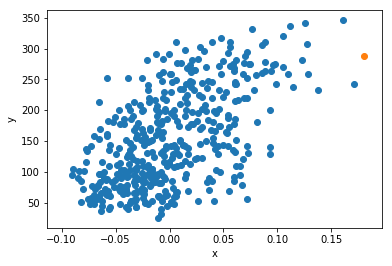

In [28]:
plt.scatter(x, y)
# pt1 = (-0.1, -0.1*w+b)
# pt2 = (0.15, 0.15*w+b)
# plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.scatter(x_new, y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 선형회귀의 뉴런 클래스

In [29]:
class Neuron : 
    def __init__(self):
        self.w = 1.0   # 가중치 초기화
        self.b = 1.0   # 절편 초기화
          
    def forpass(self, x):  # 1차 방정식을 계산하는 메서드
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprob(self, x, err):
        w_gred = x * err   # 가중치에 대한 경사하강법  # gred 경사값(기울기)... gradient
        b_gred = 1 * err   # 절편에 대한 경사하강법
        return w_gred, b_gred
    
    def fit(self, x, y, epochs=100):
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i)  # 정방향 계산
                err = -(y_i - y_hat)       # 오차 계산
                w_gred, b_gred = self.backprob(x_i, err)  # 역방향 계산
                self.w -= w_gred  # 가중치 업데이트
                self.b -= b_gred  # 절편 업데이트

In [30]:
neuron = Neuron()
neuron.fit(x, y)

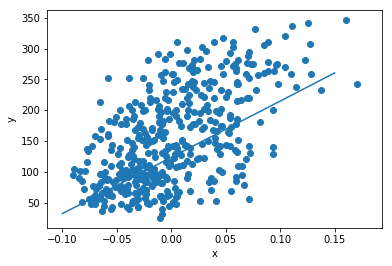

In [31]:
plt.scatter(x, y)
plt1 = (-0.1, -0.1 * neuron.w + neuron.b)
plt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([plt1[0],plt2[0]], [plt1[1],plt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<font size=4><span style="line-height:150%">
**[퍼셉트론]**  
이진분류 - 참(양성), 거짓(음성)

z = w₁x₁ + w₂x₂ + b (선형함수)
         
y　= ┌  1 (z>0)　계단함수　　양성클래스  
　 　└ -1　　　　　　　　 　음성클래스
    
선형함수를 거쳐서 계단함수를 통해서 예측값이 만들어짐..?


z = `w₁x₁` + `w₂x₂` + ... + b   
　= b + `sigma(i=1 to n) w_i x_i`

<img src="https://user-images.githubusercontent.com/58851945/119231513-3ecdeb80-bb5c-11eb-883c-9c370a65a441.png" align="left">

<font size=4><span style="line-height:150%">
**[아달린]**  
선형함수의 결과(z)를 가지고 역방향계산 함  
/ 퍼셉트론은 계단함수 후 예측값(y_hat)에서 역방향계산 함

<font size=4><span style="line-height:150%">
**[로지스틱 회귀]**  
아달린을 조금더 발전시킨 형태<br><br>
<span style="line-height:150%">
입력값으로 선형함수를 만들어내고.. => z  <br>
예측값(y_hat)을 계산하기전에  <br>
활성화함수(activation function)에서 조정 => a  <br>
그다음 임계함수(threshold function)에서 예측 실행<br><br>
<span style="line-height:150%">
**임계함수** -> 계단함수 (a>0.5 , a<=0.5) :기준 50%<br> 
<span style="line-height:150%">
**활성화함수** -> 시그모이드함수로 확률 p = 1/ (1+e^(-z)) 을 만들어냄<br>
<span style="line-height:150%">
**시그모이드함수** -> 0과 1사이의 확률값으로 변환

![image](https://user-images.githubusercontent.com/58851945/119229467-2d341600-bb53-11eb-99e8-5cef6f9c282a.png)

## 시그모이드함수
<font size=4><span style="line-height:150%">
오즈비(Odds ratio) ▶ 로짓함수(Logit func.) ▶ 시그모이드함수<br>
<span style="line-height:150%"><br>
**오즈비** = p / (1-p)　　　# p=성공확률 <br> 
　　　　1에 가까워지면 급격히 올라감<br>
<span style="line-height:150%"><br>
**로짓함수** = log ( p / (1-p) )  
　　 　 　오즈비에 로그 씌운값  
　　 　 　p가 0이나 1이 되면 무한대로 감